# Exploratory Analysis of Cleaned Data Files
This notebook contains exploratory analysis of the cleaned data provided by the city prior to being used as a dashboard.

## Load Libraries for Exploratory Analysis

In [20]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utility Libraries
import os
import warnings
warnings.filterwarnings('ignore')

# Display Options
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set(style="whitegrid")

## Load Cleaned Data

In [21]:
# Define file path to cleaned outputs
data_path = "cleaned_outputs/"

# Load Files: Cleaned expenditure and program inventory files (CSV format)
df_expenditure_status = pd.read_csv(
    os.path.join(data_path, "cleaned_expenditure_status.csv")
)

df_program_inventory = pd.read_csv(
    os.path.join(data_path, "cleaned_program_inventory.csv")
)

# Quick preview
print("✅ Cleaned Expenditure Status (Preview):")
display(df_expenditure_status.head())

print("\n✅ Cleaned Program Inventory (Preview):")
display(df_program_inventory.head())

✅ Cleaned Expenditure Status (Preview):


,adjusted_appropriation,fund_no,dept_no,activity_code,object_code,sub_object_code,account_description,department
0,"214,440.00",1000,210,410100,110,0,SALARIES AND WAGES,Council
1,"199,915.00",1000,210,410100,140,0,EMPLOYER CONTRIBUTIONS,Council
2,217.00,1000,210,410100,141,0,STATE RETIREMENT CONTRIBUTIONS,Council
3,200.00,1000,210,410100,210,0,OFFICE SUPPLIES,Council
4,750.00,1000,210,410100,230,0,REPAIR/MAINTENANCE,Council



✅ Cleaned Program Inventory (Preview):


,fund,dept_no,activity,program_title_h8,requested_title_change_i9,department_h6,ftes_h36,personnel_g27,o&m_g28,debt_g29,grant_g30,transfers_g31,capital_g32,total_expenditures_g33,cost_recovery_e58,cost_recovery_p24,description_e12,additional_activities_e20,mandate_e41,mandate_h41,mandate_e43,service_level_e47,service_level_h47,service_level_e49,reliance_e53,reliance_e55,strategic_goal_e64,strategic_goal_e66,strategic_goal_e68,strategic_goal_e74,strategic_goal_e80,trend_demand_e87,trend_demand_e89,risk_e93,risk_e95
0,1000,210,410100,LEGISLATION SERVICES,0,Council,12.00,"414,572.00","23,605.00",0,"6,000.00",0,0.00,"444,177.00",No,0.00,"Legislation Services include the salaries, tra...",0,Yes,Required by State Law,State law requires municipalities select a rep...,Yes,Required by State Law,Council has a variety of required roles under ...,High,Internal Organizational (City) Dependence,No,0,0,0,0,Demand for service is increasing,Increase in council time for committees and in...,Low/No Risk,0
1,1000,210,419000,GENERAL GOV'T ONETIME EXPENDITURES,One Time Expense - Neighborhood Traffic Manage...,Council,0.00,0.00,"20,000.00",0,0.00,0,0.00,"20,000.00",No,0.00,This activity accounts for the expenditure of ...,0,No,0,0,No,0,0,Low,0,No,0,0,0,0,Demand for service is stable,0,Low/No Risk,0
2,1000,220,410210,ADMINISTRATION,Mayor's Office,Administration,3.00,"459,928.00","69,072.00",0,0.00,0,0.00,"529,000.00",No,0.00,Provides for the operations of the Mayor's Office,0,Yes,Required by City Charter,State law requires (MCA7-4-4101) requires the ...,No,0,"Charter allows the Mayor to appoint an ""Assist...",High,Internal Organizational (City) Dependence,No,0,0,0,0,Demand for service is increasing,As the City grows and issues become more compl...,Low/No Risk,Program risk is low
3,1000,220,410250,ADMINISTRATION,Communications Office,Administration,1.00,"148,046.00","24,289.00",0,0.00,0,0.00,"172,335.00",No,0.00,"Embedded in the Mayor’s Office, this program p...",0,No,0,0,No,0,0,High,Internal Organizational (City) Dependence,Yes,Organizational Excellence and Resilience,"Drive consistency, effectiveness and excellenc...",Overhaul and implement social media policies a...,0,Demand for service is increasing,"Demand for accurate, timely, appropriate commu...",Low/No Risk,Program risk is considered low
4,1000,220,419000,GENERAL GOV'T ONETIME EXPENDITURES,0,Administration,0.00,0.00,"38,105.00",0,"16,000.00",0,0.00,"54,105.00",Yes,0.70,"$38,105 - Communications Professional Services...",0,No,0,0,No,0,0,Low,0,No,0,0,0,0,Demand for service is stable,0,Low/No Risk,0


## Data Overview

In [22]:
print("📌 Expenditure Data Shape:", df_expenditure_status.shape)
print("📌 Program Inventory Shape:", df_program_inventory.shape)

print("\n🔍 Columns in Expenditure Status:")
print(df_expenditure_status.columns.tolist())

print("\n🔍 Columns in Program Inventory:")
print(df_program_inventory.columns.tolist())

📌 Expenditure Data Shape: (2258, 8)
📌 Program Inventory Shape: (378, 35)

🔍 Columns in Expenditure Status:
['adjusted_appropriation', 'fund_no', 'dept_no', 'activity_code', 'object_code', 'sub_object_code', 'account_description', 'department']

🔍 Columns in Program Inventory:
['fund', 'dept_no', 'activity', 'program_title_h8', 'requested_title_change_i9', 'department_h6', 'ftes_h36', 'personnel_g27', 'o&m_g28', 'debt_g29', 'grant_g30', 'transfers_g31', 'capital_g32', 'total_expenditures_g33', 'cost_recovery_e58', 'cost_recovery_p24', 'description_e12', 'additional_activities_e20', 'mandate_e41', 'mandate_h41', 'mandate_e43', 'service_level_e47', 'service_level_h47', 'service_level_e49', 'reliance_e53', 'reliance_e55', 'strategic_goal_e64', 'strategic_goal_e66', 'strategic_goal_e68', 'strategic_goal_e74', 'strategic_goal_e80', 'trend_demand_e87', 'trend_demand_e89', 'risk_e93', 'risk_e95']


##  Summary Statistics

In [23]:
# Convert to numeric for analysis, if not already
df_expenditure_status["adjusted_appropriation"] = pd.to_numeric(
    df_expenditure_status["adjusted_appropriation"], errors="coerce"
)

# Summary of adjusted appropriations
print("💰 Summary of Adjusted Appropriations:")
display(df_expenditure_status["adjusted_appropriation"].describe())

# Top 10 largest accounts
print("\n🏛️ Top 10 Largest Budget Allocations:")
display(df_expenditure_status.sort_values("adjusted_appropriation", ascending=False).head(10))

💰 Summary of Adjusted Appropriations:


count        2,258.00
mean       149,906.04
std        796,863.98
min         -3,438.00
25%            500.00
50%          5,865.00
75%         58,828.25
max     24,755,342.00
Name: adjusted_appropriation, dtype: float64


🏛️ Top 10 Largest Budget Allocations:


,adjusted_appropriation,fund_no,dept_no,activity_code,object_code,sub_object_code,account_description,department
1662,"24,755,342.00",4034,280,430232,930,241,DOWNTOWN SAM PROJECT,Transfers
1717,"15,982,268.00",4980,280,430233,930,0,IMPROVEMENTS,Transfers
2186,"9,079,291.00",7393,385,470230,845,0,CONTINGENCY,Transfers
665,"8,318,058.00",1000,300,420460,110,0,SALARIES AND WAGES,Fire
901,"8,112,803.00",2372,390,521000,820,0,TRANSFERS TO OTHER FUNDS,Transfers
2050,"6,379,148.00",6050,390,520800,351,0,INSURANCE CLAIMS,Transfers
1829,"4,860,973.00",5210,335,490200,620,0,INTEREST / SERVICE FEES,"Public Works, Mobility, & Infrastructure"
533,"4,736,279.00",1000,290,420151,110,0,SALARIES AND WAGES,Police
2194,"4,711,845.00",7394,385,521010,820,0,TRANSFERS TO MRA,Transfers
2157,"4,126,606.00",7392,385,470230,845,0,CONTINGENCY,Transfers


## Department-Level Analysis

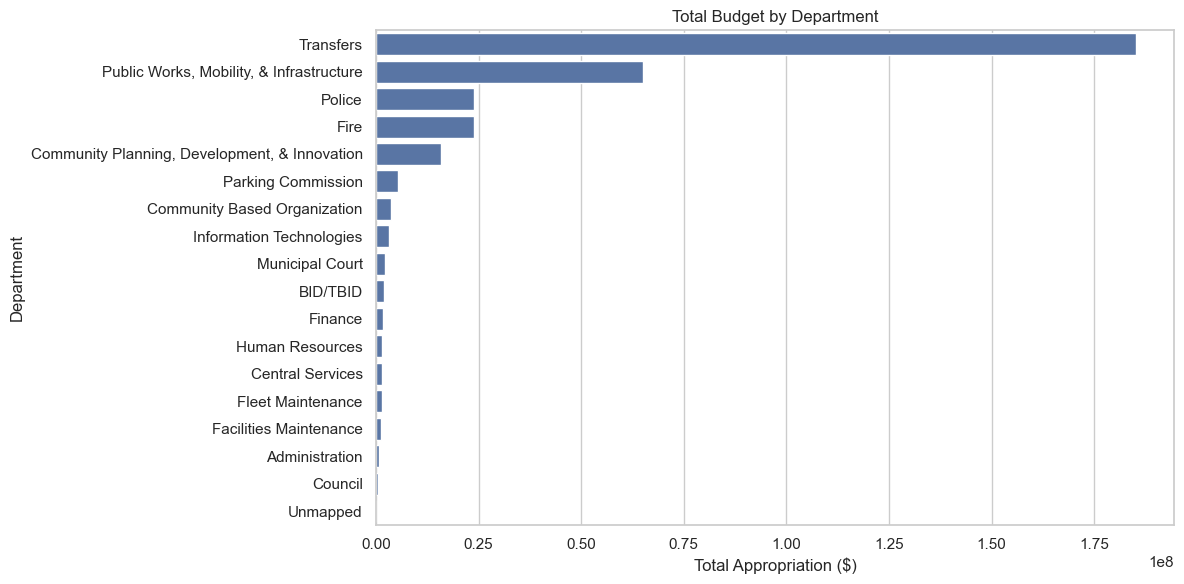

In [24]:
# Total budget by department
dept_totals = df_expenditure_status.groupby("department")["adjusted_appropriation"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_totals.values, y=dept_totals.index)
plt.title("Total Budget by Department")
plt.xlabel("Total Appropriation ($)")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

## Program-Level Analysis

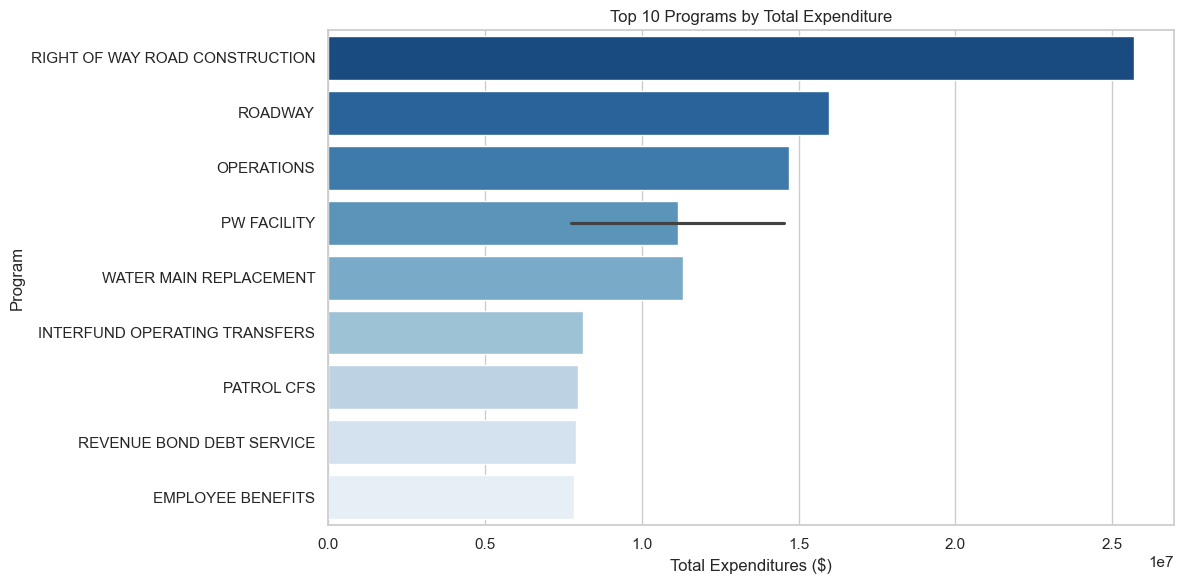

In [25]:
# Top programs by total expenditure
top_programs = df_program_inventory.sort_values("total_expenditures_g33", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="total_expenditures_g33", y="program_title_h8",
    data=top_programs, palette="Blues_r"
)
plt.title("Top 10 Programs by Total Expenditure")
plt.xlabel("Total Expenditures ($)")
plt.ylabel("Program")
plt.tight_layout()
plt.show()

## Budget Allocation Breakdown (O&M, Personnel, Capital)

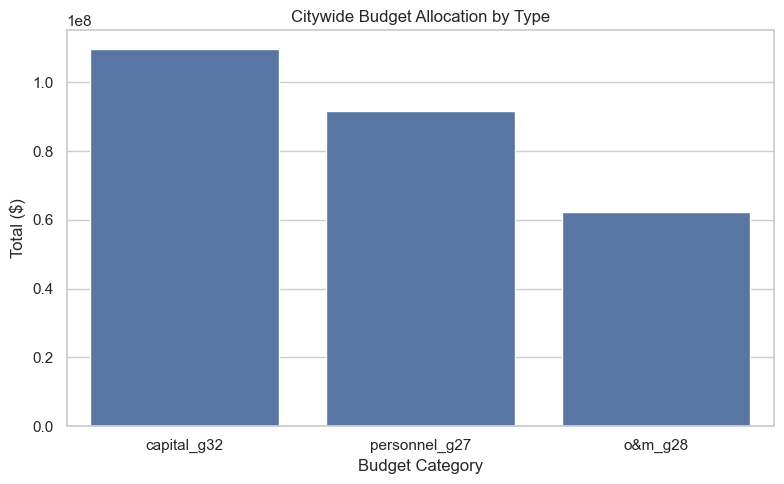

In [26]:
budget_cols = ["personnel_g27", "o&m_g28", "capital_g32"]

df_program_inventory[budget_cols] = df_program_inventory[budget_cols].apply(pd.to_numeric, errors="coerce")

# Sum totals
component_totals = df_program_inventory[budget_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=component_totals.index, y=component_totals.values)
plt.title("Citywide Budget Allocation by Type")
plt.ylabel("Total ($)")
plt.xlabel("Budget Category")
plt.tight_layout()
plt.show()

## Risk, Trend, Mandate Visuals

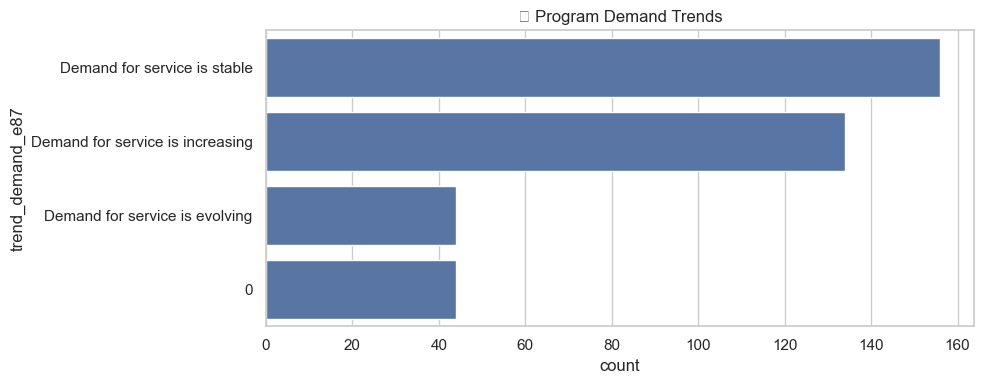

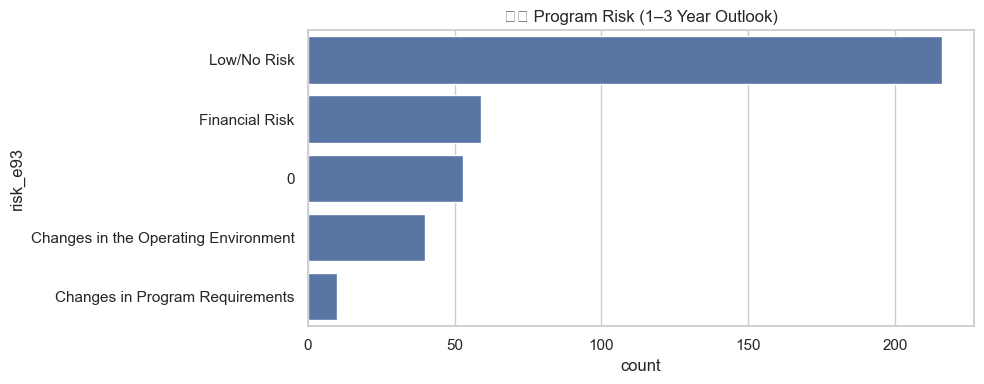

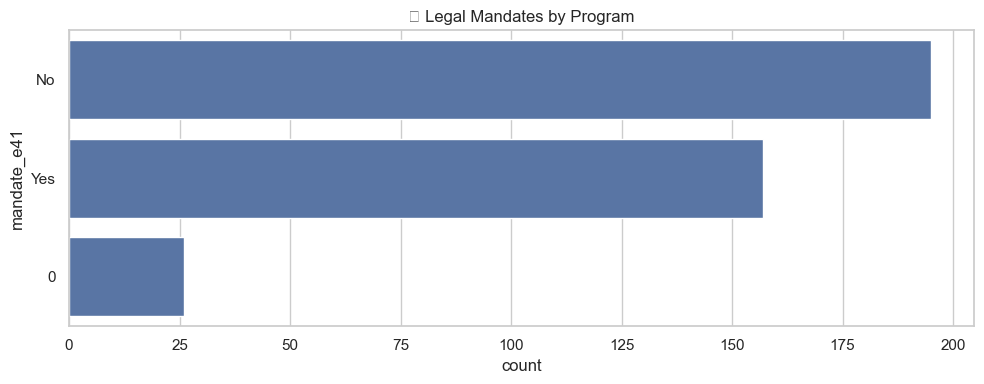

In [27]:
# Trend
plt.figure(figsize=(10, 4))
sns.countplot(y="trend_demand_e87", data=df_program_inventory, order=df_program_inventory["trend_demand_e87"].value_counts().index)
plt.title("📈 Program Demand Trends")
plt.tight_layout()
plt.show()

# Risk
plt.figure(figsize=(10, 4))
sns.countplot(y="risk_e93", data=df_program_inventory, order=df_program_inventory["risk_e93"].value_counts().index)
plt.title("⚠️ Program Risk (1–3 Year Outlook)")
plt.tight_layout()
plt.show()

# Mandate
plt.figure(figsize=(10, 4))
sns.countplot(y="mandate_e41", data=df_program_inventory, order=df_program_inventory["mandate_e41"].value_counts().index)
plt.title("📜 Legal Mandates by Program")
plt.tight_layout()
plt.show()

## Missing Values Overview

🔍 Missing Values: Expenditure Status


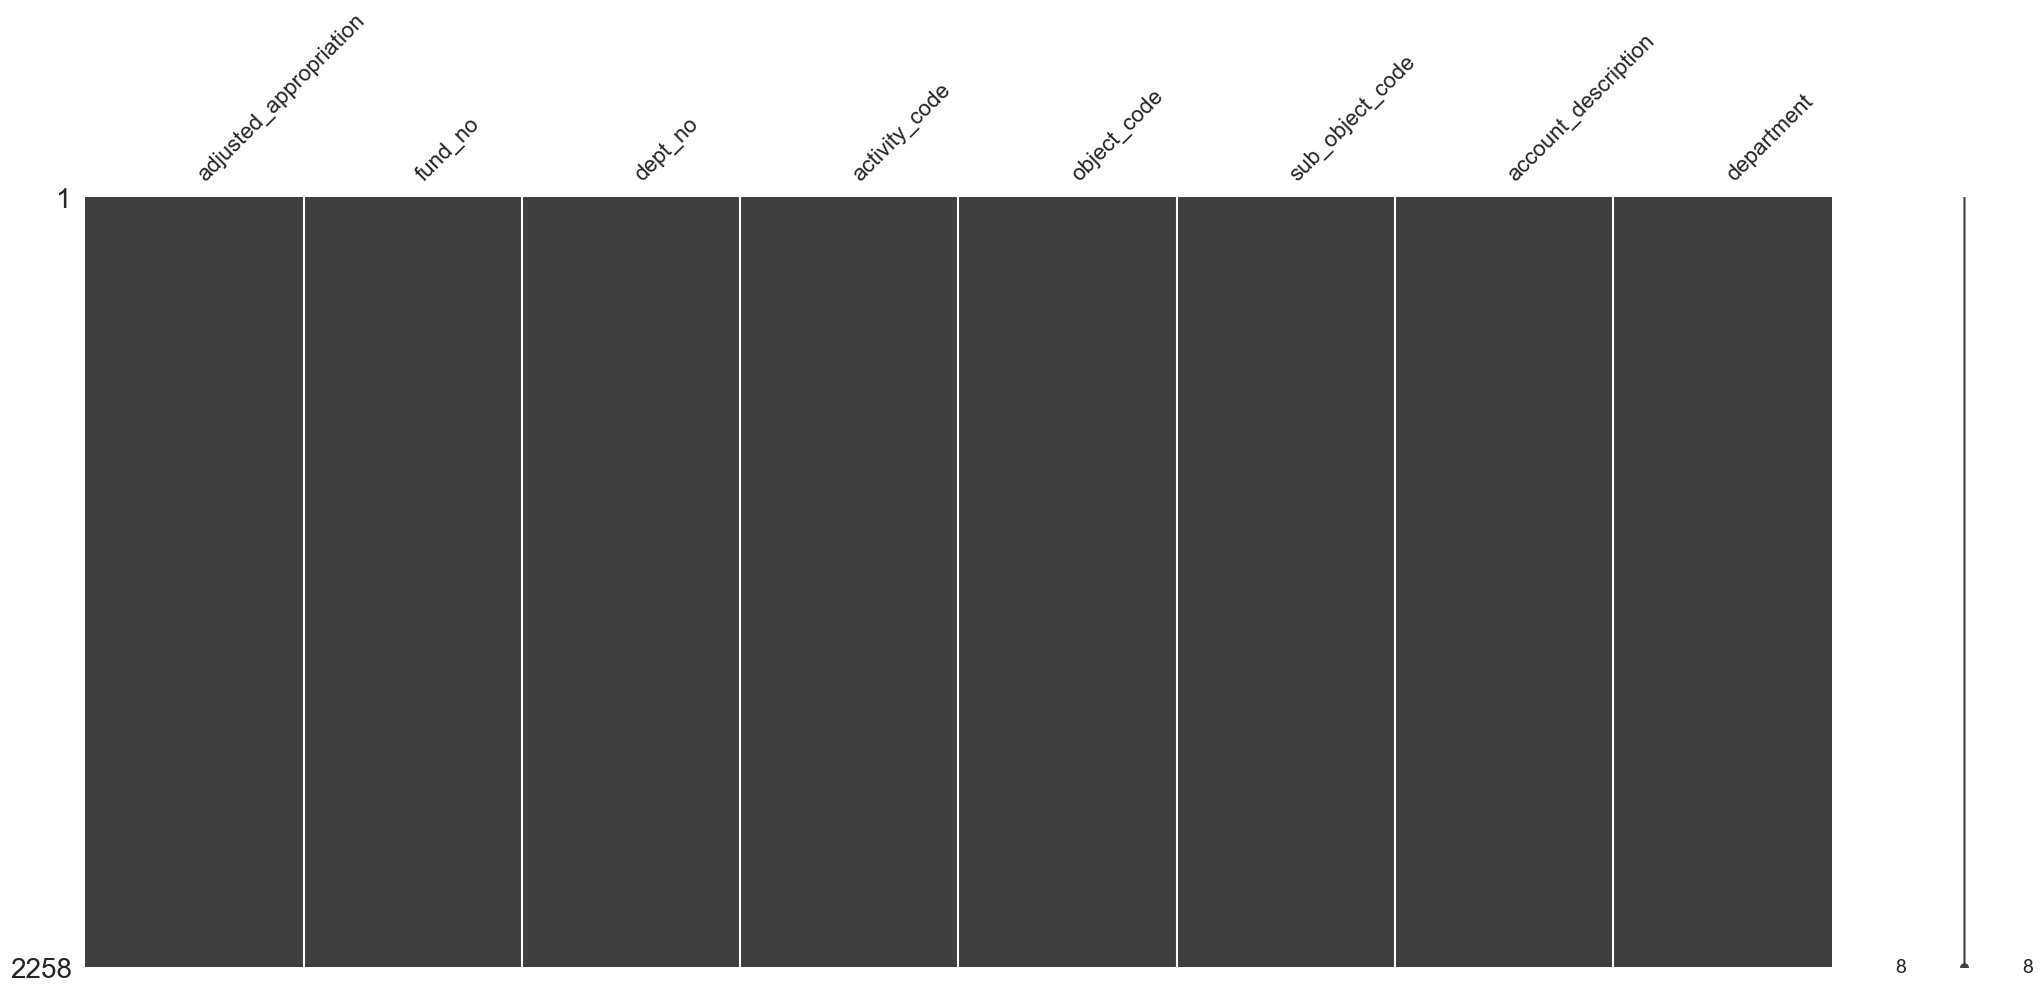

🔍 Missing Values: Program Inventory


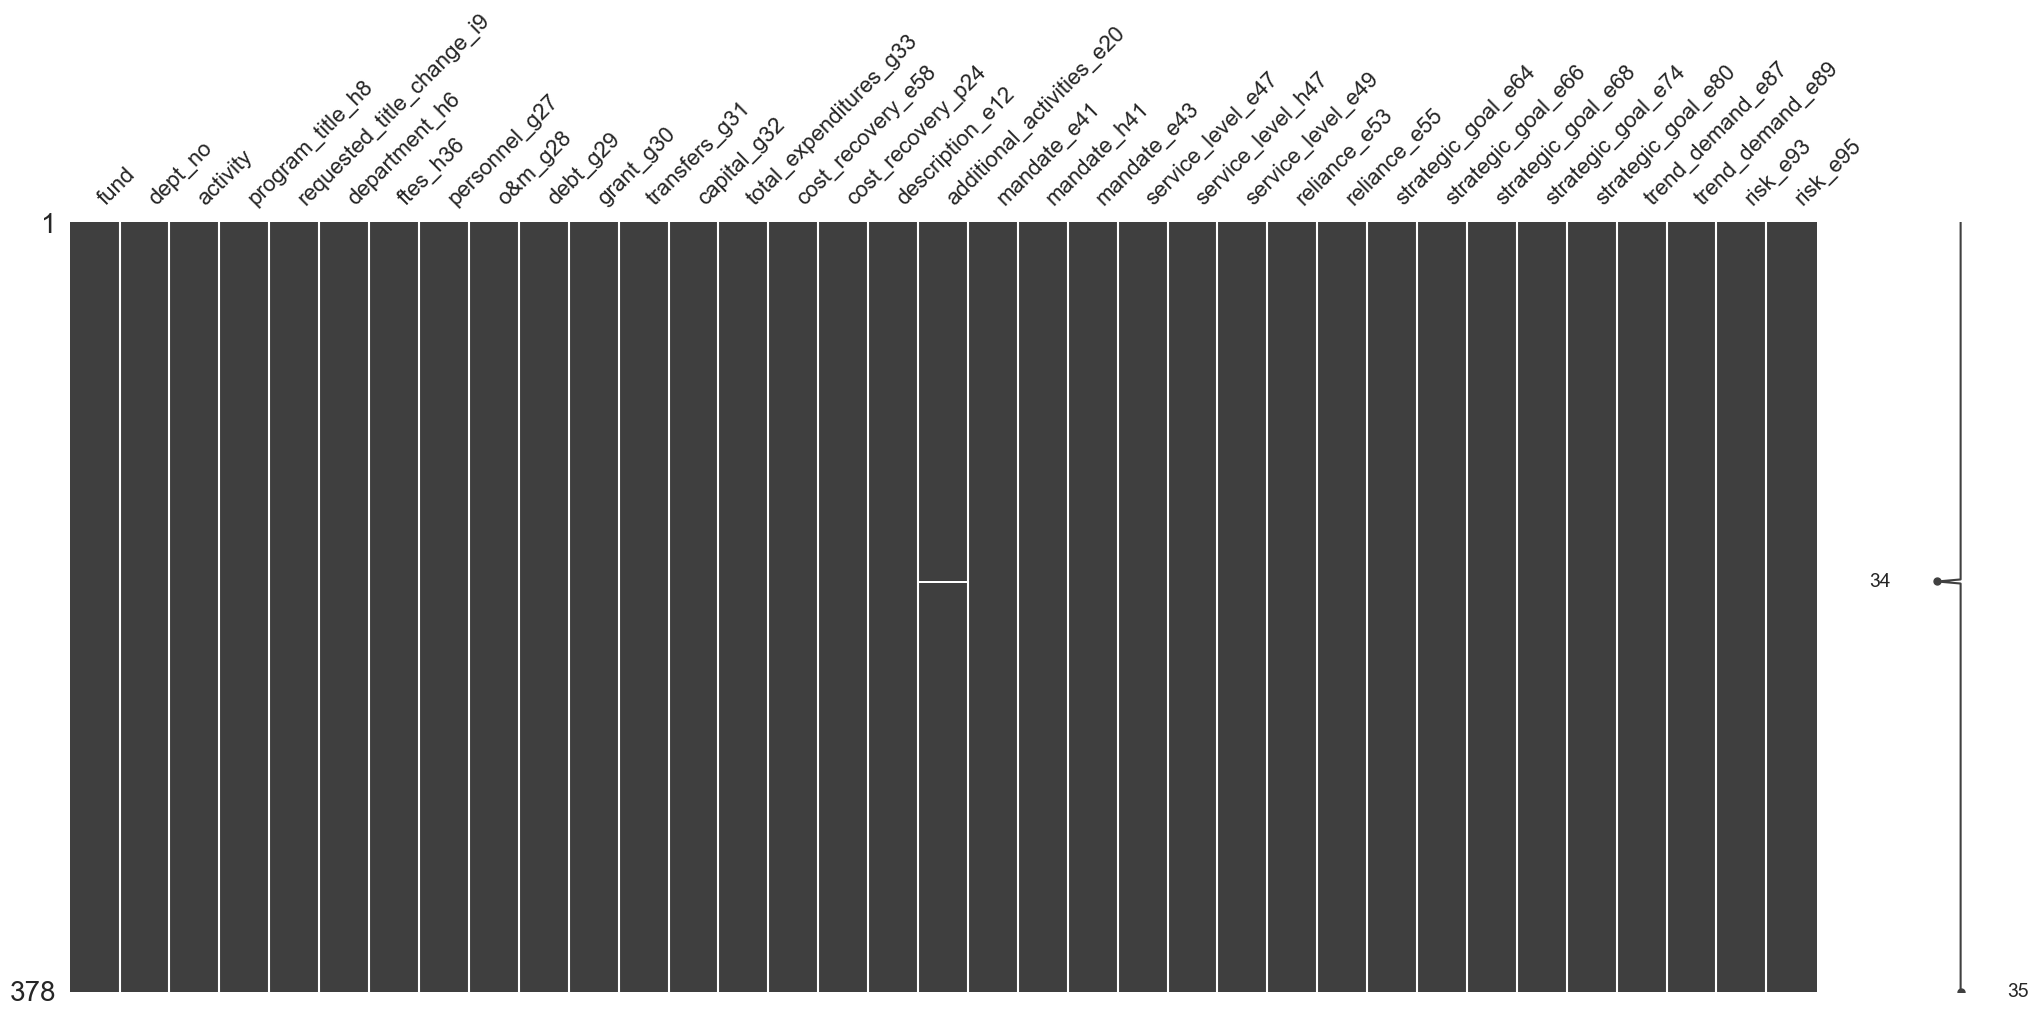

In [28]:
# Missing values heatmap
import missingno as msno

print("🔍 Missing Values: Expenditure Status")
msno.matrix(df_expenditure_status)
plt.show()

print("🔍 Missing Values: Program Inventory")
msno.matrix(df_program_inventory)
plt.show()

## FTE vs Program Spending
This chart hilights if high-cost programs are staff-heavy and where outliers might exist. 

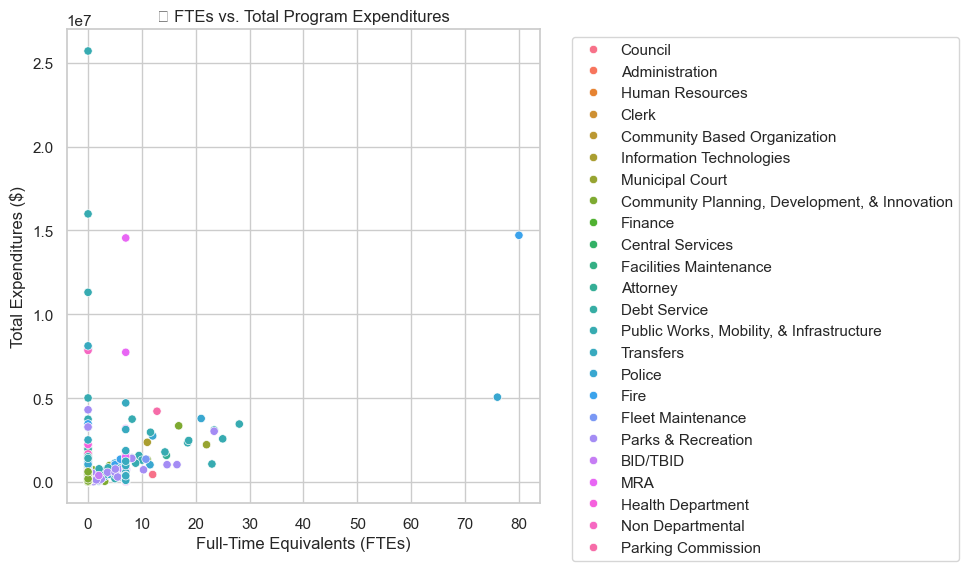

In [29]:
# Ensure numeric types
df_program_inventory["ftes_h36"] = pd.to_numeric(df_program_inventory["ftes_h36"], errors="coerce")
df_program_inventory["total_expenditures_g33"] = pd.to_numeric(df_program_inventory["total_expenditures_g33"], errors="coerce")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_program_inventory,
    x="ftes_h36", y="total_expenditures_g33",
    hue="department_h6"
)
plt.title("💼 FTEs vs. Total Program Expenditures")
plt.xlabel("Full-Time Equivalents (FTEs)")
plt.ylabel("Total Expenditures ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## High Risk + High Investment Flags

In [30]:
# Normalize risk to numerical scale for sorting
risk_map = {
    "High": 3, "Medium": 2, "Low": 1
}
df_program_inventory["risk_score"] = df_program_inventory["risk_e93"].map(risk_map)

# Flagging high risk & top expenditure programs
high_risk_spend = df_program_inventory[
    (df_program_inventory["risk_score"] == 3) &
    (df_program_inventory["total_expenditures_g33"] > df_program_inventory["total_expenditures_g33"].median())
]

display(high_risk_spend[["program_title_h8", "department_h6", "total_expenditures_g33", "risk_e93"]])

,program_title_h8,department_h6,total_expenditures_g33,risk_e93


## Mandate vs Risk (Stacked Count)

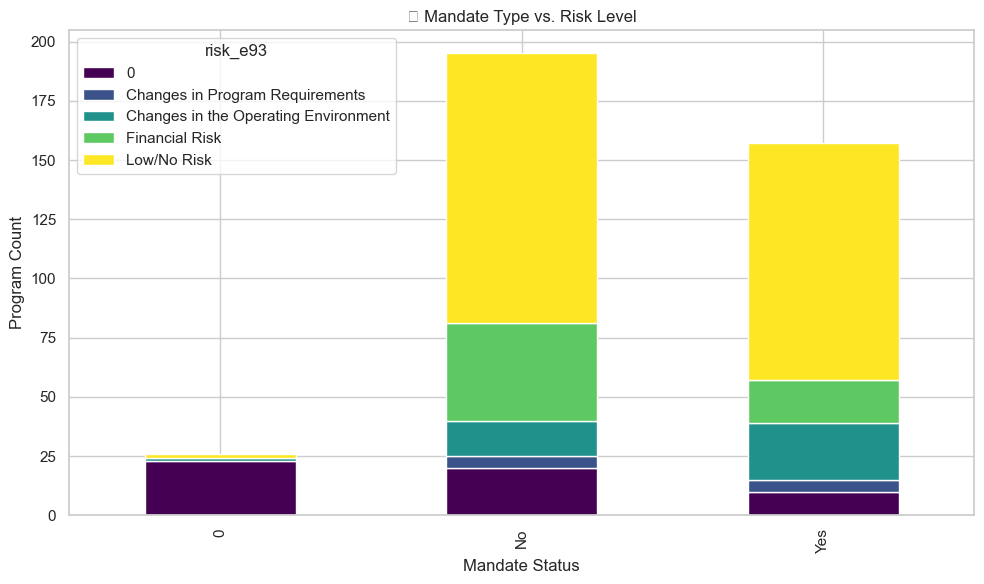

In [31]:
# Crosstab for stacked bar
mandate_risk_ct = pd.crosstab(
    df_program_inventory["mandate_e41"], 
    df_program_inventory["risk_e93"]
)

# Plot
mandate_risk_ct.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("📚 Mandate Type vs. Risk Level")
plt.xlabel("Mandate Status")
plt.ylabel("Program Count")
plt.tight_layout()
plt.show()

## Department Risk / Trend Heatmap

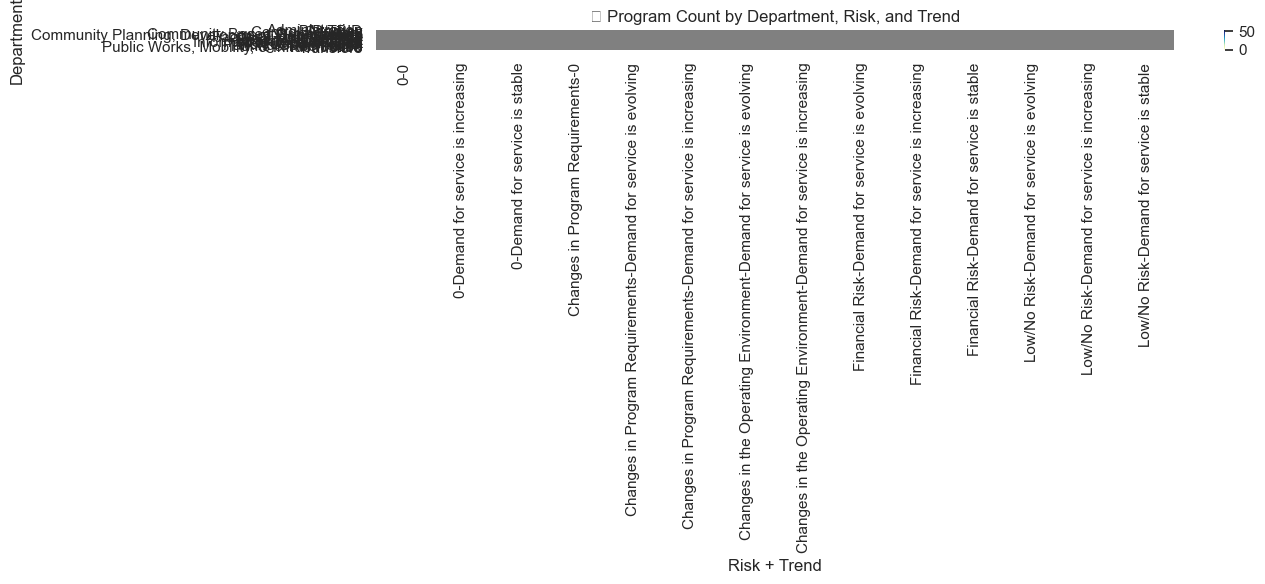

In [32]:
# Create pivot table
dept_heat = pd.crosstab(
    df_program_inventory["department_h6"],
    [df_program_inventory["risk_e93"], df_program_inventory["trend_demand_e87"]]
)

# Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(dept_heat, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("📊 Program Count by Department, Risk, and Trend")
plt.ylabel("Department")
plt.xlabel("Risk + Trend")
plt.tight_layout()
plt.show()